# Recommendation System / Collaborative Filtering on Book Recommendation Dataset :

## **Book Recommendation Dataset**

The datasets describe ratings of a book recommendation service obtained from Amazon Web Services. It has 242135 Books, 102024 Authors and the  Ratings are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.
Link : https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?select=Users.csv

Importing necessary Libraries :

In [ ]:
import os
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import seaborn as sns

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/'
!kaggle datasets download -d arashnic/book-recommendation-dataset

book-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzipping the book-recommendation-dataset.zip :

In [ ]:
!unzip \*.zip

Archive:  book-recommendation-dataset.zip
replace Books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Users.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace recsys_taxonomy2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Loading the datasets :

In [ ]:
books = pd.read_csv('/content/Books.csv')
ratings = pd.read_csv('/content/Ratings.csv')
users = pd.read_csv('/content/Users.csv')

<ipython-input-4-013a2cca4fde>:1: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



### Books Data :

Glimpse of the Books Dataset :

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


WordCloud on Book Titles :

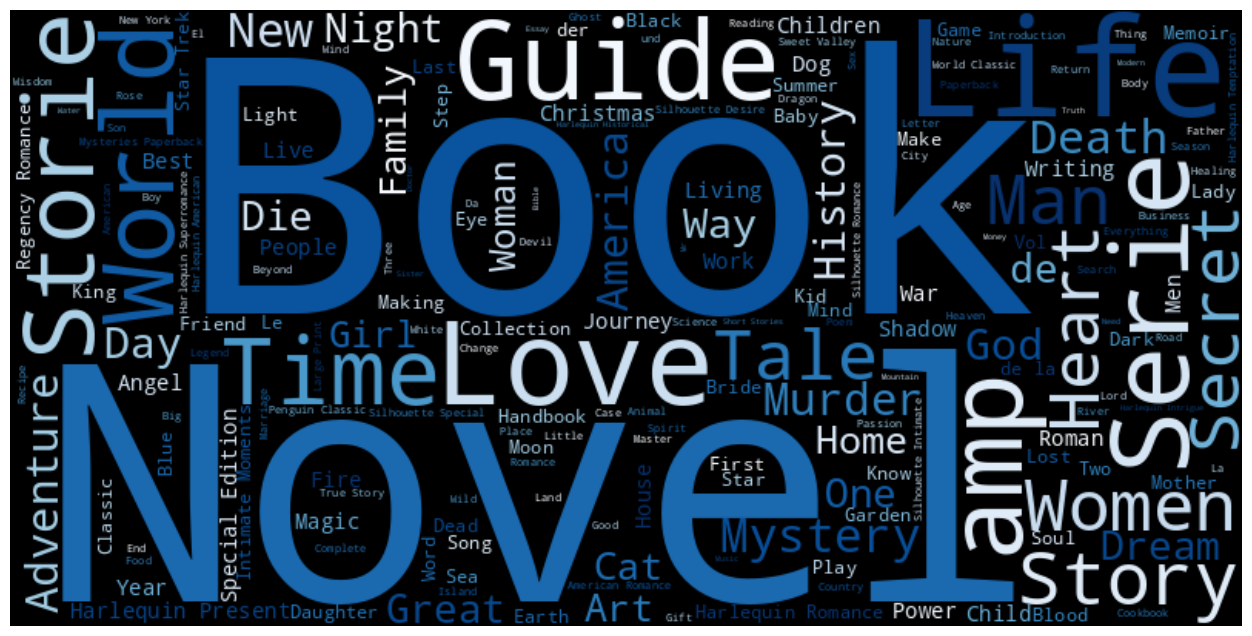

In [ ]:
books['Book-Title'] = books['Book-Title'].fillna("").astype(str)
book_title = ' '.join(books['Book-Title'])

wordcloud = WordCloud(width=800, height=400, colormap="Blues")
wordcloud.generate(book_title)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Top 10 Authors :

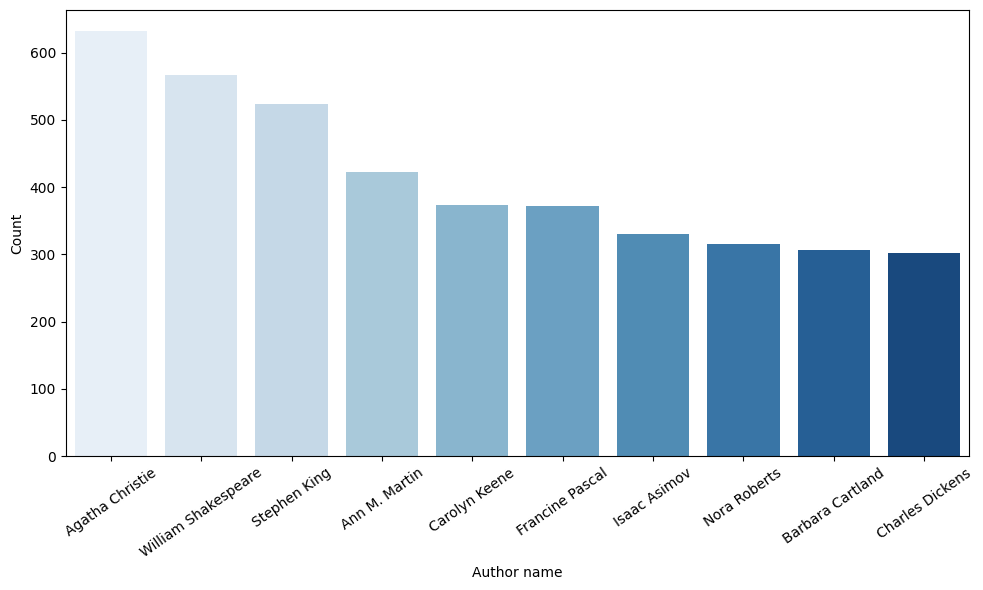

In [ ]:
def plot_top10(df, column, title, x_label, y_label, top=10):
    plt.figure(figsize=(10, 6))

    pl = df[column].value_counts().head(top)
    sns.barplot(x=pl.index, y=pl.values, palette="Blues")

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=35)
    plt.tight_layout()
    plt.show()

plot_top10(books, 'Book-Author', "", "Author name", "Count")

Top 10 Publishers:

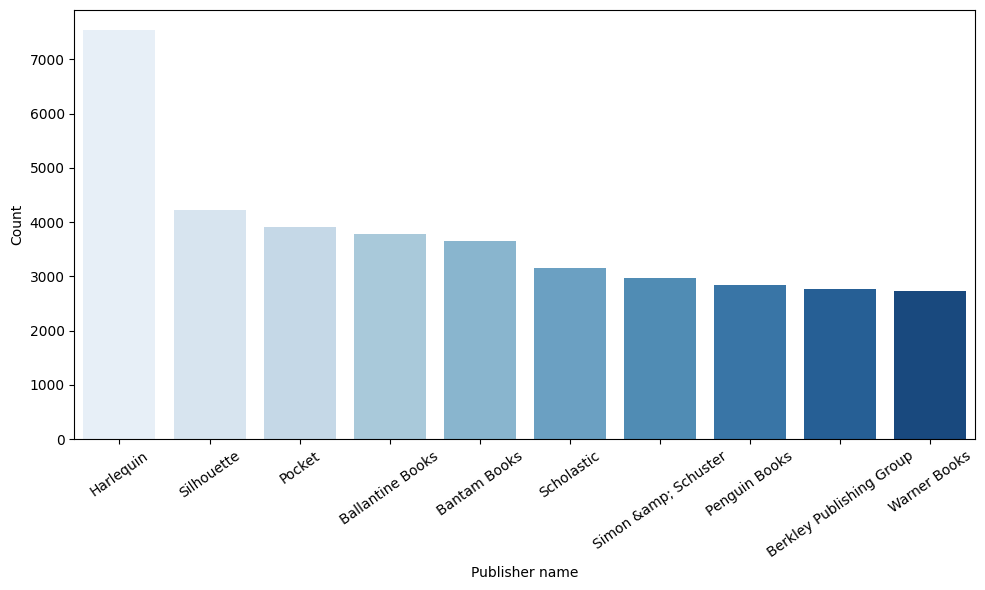

In [ ]:
plot_top10(books, 'Publisher', "", "Publisher name", "Count")

### Ratings Data :

Glimpse of the Ratings Dataset :

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Merging Books and Ratings Data :

In [ ]:
books_with_ratings = pd.merge(books, ratings, on='ISBN')
books_with_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


Top 10 Authors average Book Ratings :

In [ ]:
authors_top10 = books['Book-Author'].value_counts().head(10)
authors_top10 = list(authors_top10.index)
books_with_ratings.dropna(inplace=True) # The null values are dropped as there are only 3 null values
top10_authors = pd.DataFrame(columns = books_with_ratings.columns)

for author in authors_top10:

    cond_df = books_with_ratings[books_with_ratings['Book-Author'] == author]

    top10_authors =  pd.concat([top10_authors, cond_df], axis=0)

top10_author = top10_authors[top10_authors['Book-Rating'] != 0] # Books are rated from 1-10.
top10_author = top10_author.groupby('Book-Author')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)
top10_author

,Book-Author,Book-Rating
9,William Shakespeare,8.303357
6,Isaac Asimov,7.915167
3,Carolyn Keene,7.823529
8,Stephen King,7.815046
0,Agatha Christie,7.792102
4,Charles Dickens,7.762836
7,Nora Roberts,7.629680
1,Ann M. Martin,6.708333
5,Francine Pascal,6.659091
2,Barbara Cartland,5.041812


Top 10 Publishers average ratings :

In [ ]:
publishers_top10 = books['Publisher'].value_counts().head(10)
publishers_top10 = list(publishers_top10.index)

top10_publishers = pd.DataFrame(columns = books_with_ratings.columns)

for pub in publishers_top10:

    cond_df = books_with_ratings[books_with_ratings['Publisher'] == pub]

    top10_publishers =  pd.concat([top10_publishers, cond_df], axis=0)


top10_publishers = top10_publishers[top10_publishers['Book-Rating'] != 0]
top10_publishers = top10_publishers.groupby('Publisher')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)

top10_publishers

,Publisher,Book-Rating
6,Scholastic,7.818161
4,Penguin Books,7.773789
0,Ballantine Books,7.610437
5,Pocket,7.564115
9,Warner Books,7.543623
8,Simon &amp; Schuster,7.522894
1,Bantam Books,7.520811
2,Berkley Publishing Group,7.443836
7,Silhouette,7.239616
3,Harlequin,7.170115


###Users Data:

Glimpse of the Users Dataset :

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


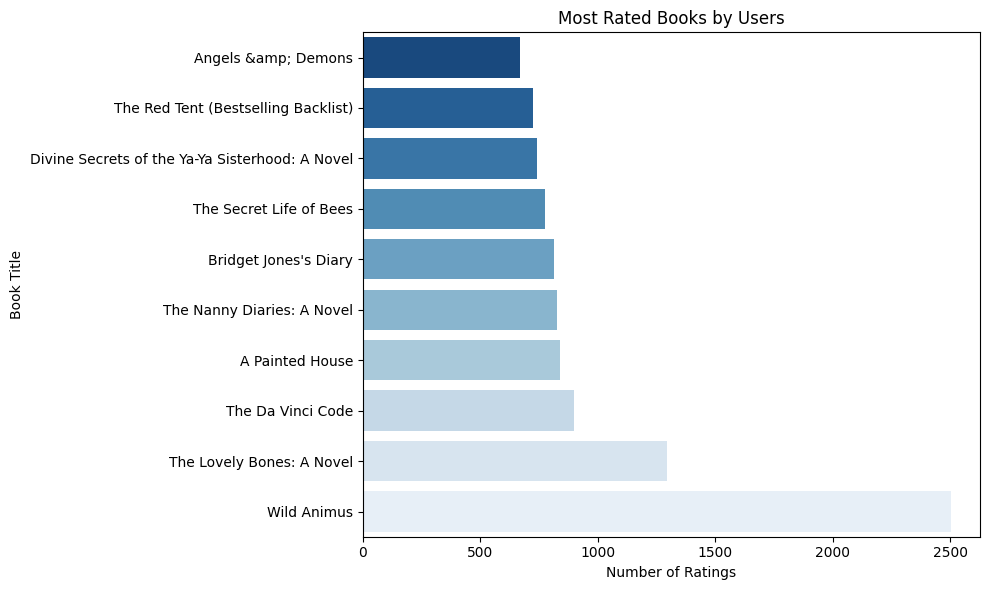

In [ ]:
def plot_top10(df, column, title, x_label, y_label, top=10):
    plt.figure(figsize=(10, 6))

    pl = df[column].value_counts().head(top)
    ax = sns.barplot(y=pl.index, x=pl.values, palette="Blues")

    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.tight_layout()
    ax.invert_yaxis()
    plt.show()

plot_top10(books_with_ratings, 'Book-Title', "Most Rated Books by Users", "Number of Ratings", "Book Title")

Top rated books by Users :

In [ ]:
books_top10 = books_with_ratings['Book-Title'].value_counts().head(10)
books_top10 = list(books_top10.index)

top10_books = pd.DataFrame(columns = books_with_ratings.columns)

for book in books_top10:

    cond_df = books_with_ratings[books_with_ratings['Book-Title'] == book]

    top10_books =  pd.concat([top10_books, cond_df], axis=0)


top10_books = top10_books[top10_books['Book-Rating'] != 0]
top10_books = top10_books.groupby('Book-Title')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)

top10_books = top10_books.head(10)
top10_books

,Book-Title,Book-Rating
8,The Secret Life of Bees,8.477833
4,The Da Vinci Code,8.439271
5,The Lovely Bones: A Novel,8.185290
7,The Red Tent (Bestselling Backlist),8.182768
1,Angels &amp; Demons,8.016129
3,Divine Secrets of the Ya-Ya Sisterhood: A Novel,7.876161
2,Bridget Jones's Diary,7.625995
6,The Nanny Diaries: A Novel,7.437659
0,A Painted House,7.398907
9,Wild Animus,4.390706


### Dataset Details :

Checking the number of rows and columns in the dataset :

In [ ]:
def shape_of_dataset(df, dataset_name="df"):

    print(f"{dataset_name} dataset has {df.shape[0]} nrows and {df.shape[1]} ncolumns")
    return df.shape[0], df.shape[1]

books_r, books_c = shape_of_dataset(books, "Books")
ratings_r, ratings_c = shape_of_dataset(ratings, "Ratings")
users_r, users_c = shape_of_dataset(users, "Users")

Books dataset has 271360 nrows and 8 ncolumns
Ratings dataset has 1149780 nrows and 3 ncolumns
Users dataset has 278858 nrows and 3 ncolumns


Checking for null values in the dataset:

In [ ]:
def count_null_values(df, dataset_name):

    num_of_total_null_values = sum(df.isnull().sum().values)
    print(f"{dataset_name} dataset has {num_of_total_null_values} null values")
    return num_of_total_null_values

books_null = count_null_values(books, "Books")
ratings_null = count_null_values(ratings, "Ratings")
users_null = count_null_values(users, "Users")

Books dataset has 6 null values
Ratings dataset has 0 null values
Users dataset has 110762 null values



Information :

In [ ]:
def print_info_about_ds(df, name_of_the_ds = "df"):
    print(f"Infomations about the {name_of_the_ds} dataset: ")
    dash_sep()
    print(df.info())

def dash_sep(num=50):
    print("_"*num)

def double_fs_sep(num=40):
    print("//"*num)

print_info_about_ds(books, "Books")
double_fs_sep()

print_info_about_ds(ratings, "Ratings")
double_fs_sep()

print_info_about_ds(users, "Users")

Infomations about the Books dataset: 
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
////////////////////////////////////////////////////////////////////////////////
Infomations about the Ratings dataset: 
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Dat

 Unique values :

In [ ]:
def print_nunique_vals(df, ds_name = 'df'):
    print(f"Number of unique values in each of the column in the {ds_name} Dataset:")
    dash_sep(75)
    print(df.nunique())

print_nunique_vals(books, 'Books')
double_fs_sep()

print_nunique_vals(ratings, 'Ratings')
double_fs_sep()

print_nunique_vals(users, 'Users')

Number of unique values in each of the column in the Books Dataset:
___________________________________________________________________________
ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64
////////////////////////////////////////////////////////////////////////////////
Number of unique values in each of the column in the Ratings Dataset:
___________________________________________________________________________
User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64
////////////////////////////////////////////////////////////////////////////////
Number of unique values in each of the column in the Users Dataset:
___________________________________________________________________________
User-ID     278858
Location     57339
Age            165
dtype: int64


Datatypes :

In [ ]:
def print_dtype_of_df(df, ds_name = 'df'):
    print(f"Datatypes of each of the columns in the {ds_name} dataset:")
    dash_sep(75)
    print(df.dtypes)

print_dtype_of_df(books, 'Books')
double_fs_sep()

print_dtype_of_df(ratings, 'Ratings')
double_fs_sep()

print_dtype_of_df(users, 'Users')

Datatypes of each of the columns in the Books dataset:
___________________________________________________________________________
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object
////////////////////////////////////////////////////////////////////////////////
Datatypes of each of the columns in the Ratings dataset:
___________________________________________________________________________
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object
////////////////////////////////////////////////////////////////////////////////
Datatypes of each of the columns in the Users dataset:
___________________________________________________________________________
User-ID       int64
Location     object
Age         float64
dtype: object
